In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## Q1 K-Means

Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a bried explanation as to how PCA can help with clustering in this example.

In [156]:
dataset = pd.read_csv("Live_20210128.csv")

In [157]:
dataset.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [158]:
data = dataset.drop(['Column1','Column2','Column3','Column4','status_id','status_published'], axis= 1)

In [159]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


array([[<AxesSubplot:title={'center':'num_reactions'}>,
        <AxesSubplot:title={'center':'num_comments'}>,
        <AxesSubplot:title={'center':'num_shares'}>],
       [<AxesSubplot:title={'center':'num_likes'}>,
        <AxesSubplot:title={'center':'num_loves'}>,
        <AxesSubplot:title={'center':'num_wows'}>],
       [<AxesSubplot:title={'center':'num_hahas'}>,
        <AxesSubplot:title={'center':'num_sads'}>,
        <AxesSubplot:title={'center':'num_angrys'}>]], dtype=object)

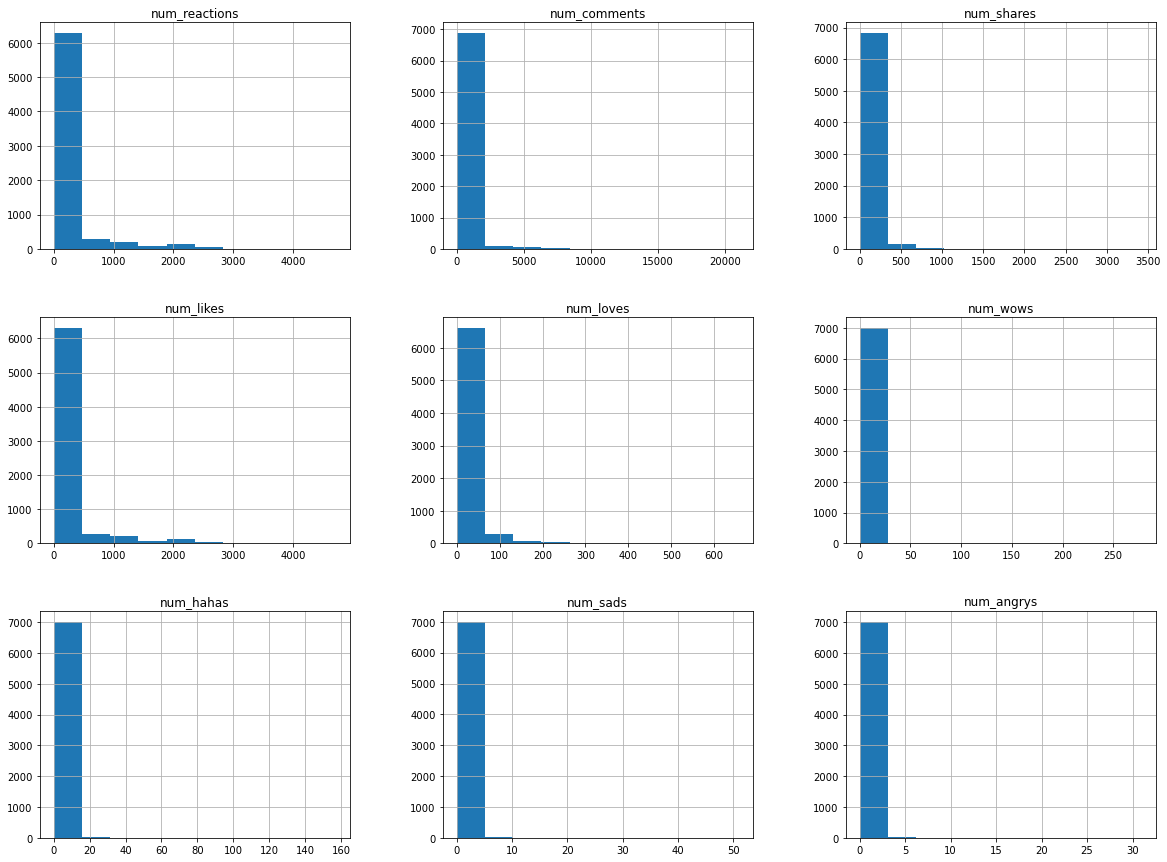

In [160]:
data.hist(bins= 10, figsize=(20,15))

Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements

### K means with One hot encoding

In [161]:
data_copy = pd.get_dummies(data, columns= ['status_type'])

In [162]:
data_copy.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


In [163]:
X = np.array(data_copy)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X[:,:-4])
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [164]:
X['status_type_link'] = data_copy['status_type_link']
X['status_type_photo'] = data_copy['status_type_photo']
X['status_type_status'] = data_copy['status_type_status']
X['status_type_video'] = data_copy['status_type_video']
X = np.array(X)

In [165]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,random_state = 42, max_iter=100)
km.fit(X)

KMeans(max_iter=100, n_clusters=2, random_state=42)

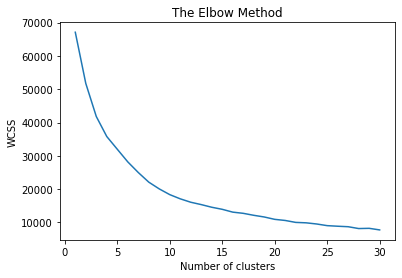

In [166]:
from sklearn.cluster import KMeans
wcss = []  ##wcss stands for Within Cluster Sum of Squares
for i in range(1, 31):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 31), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In order to choose appropriate number of clusters, we graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).

Around 10 clusters seems appropriate.

In [167]:
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=10,random_state = 42, max_iter=100)

km1.fit(X)
y_kmeans = km1.fit_predict(X)
y_kmeans = pd.DataFrame(y_kmeans)
y_kmeans.value_counts()

4    4043
0    1804
1     618
2     365
9      89
3      78
7      23
8      15
6       8
5       7
dtype: int64

Using PCA along with K means

In [168]:
from sklearn.decomposition import PCA

In [169]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_.cumsum()

array([0.36876407, 0.55222929, 0.65364376, 0.74239576, 0.82691554,
       0.89982733, 0.94290932, 0.97568279, 0.99128379, 0.99878243,
       1.        , 1.        , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

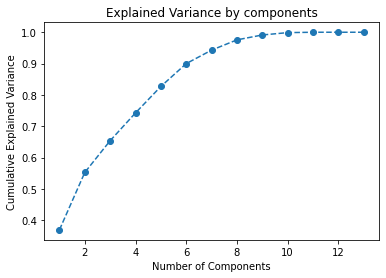

In [170]:
plt.plot(range(1,14),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

We can choose 5 or 6 features using PCA

In [171]:
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

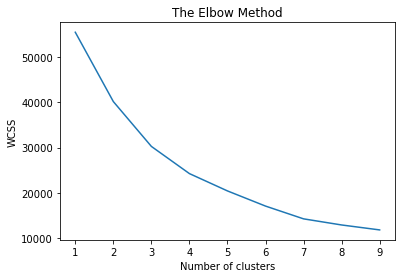

In [172]:
wcss = []  ##wcss stands for Within Cluster Sum of Squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

4 clusters seem to be suitable 

In [173]:
import time
start1 = time.time()
km_pca = KMeans(n_clusters=4,random_state = 42, max_iter=100)
km_pca.fit(X_pca)
y_kmeans_pca = km_pca.fit_predict(X_pca)
y_kmeans_pca = pd.DataFrame(y_kmeans_pca)
y_kmeans_pca.value_counts()
end1 = time.time()
print(" Time required: " + str(end1-start1))

 Time required: 0.28519344329833984


In [174]:
import time
start1 = time.time()
km_pca = KMeans(n_clusters=4,init='k-means++',random_state = 42, max_iter=100)
km_pca.fit(X_pca)
y_kmeans_pca = km_pca.fit_predict(X_pca)
y_kmeans_pca = pd.DataFrame(y_kmeans_pca)
y_kmeans_pca.value_counts()
end1 = time.time()
print(" Time required: " + str(end1-start1))

 Time required: 0.23482394218444824


Note: With k-means++ algorithm, the time required reduces due to better initialization 

In [175]:
cluster = pd.concat([data,pd.DataFrame(X_pca)],axis =1 )
cluster.columns.values[-5:] = ['Component 1', 'Component 2','Component 3','Component 4','Component 5']
cluster['Cluster number'] = km_pca.labels_
cluster.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster number
0,video,529,512,262,432,92,3,1,1,0,2.366491,-0.157768,0.071954,-0.727902,0.001615,1
1,photo,150,0,0,150,0,0,0,0,0,-0.698267,0.072443,-0.070505,0.085603,-0.075334,0
2,video,227,236,57,204,21,1,1,0,0,0.227063,-0.128665,-0.158077,-0.344579,0.131121,0
3,photo,111,0,0,111,0,0,0,0,0,-0.746089,-0.036650,-0.085789,0.091574,-0.086772,0
4,photo,213,0,0,204,9,0,0,0,0,-0.520950,0.198077,-0.081585,0.069639,-0.063131,0


PCA will help in visualisation as well as the dimensions are reduced but since it is difficult to visualise more than 2 dimensions, lets visualise the segments based on only first 2 components

c:\Users\Pujan Chitalia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


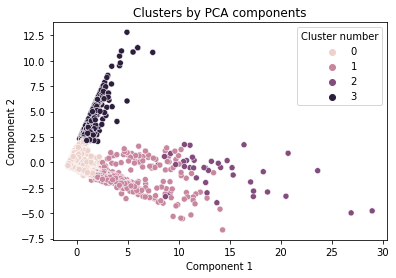

In [176]:
x_axis = cluster['Component 1']
y_axis = cluster['Component 2']
sns.scatterplot(x_axis,y_axis,hue = cluster['Cluster number'] )
plt.title('Clusters by PCA components')
plt.show()

So when we use PCA before K-means, we can visually seperate almost the entire dataset. This is one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

## Q2 Loss Functions

Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 

In [177]:
#Symmetric Loss Function

actual = [0,1,0,0,1,0,0,1,1,1]
predictions = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

loss = 0
for i in range(len(actual)):
  if actual[i] == round(predictions[i]):
    loss += 0
  else:
    loss += 1
loss = loss / len(actual)

print(loss)

0.5


In [178]:
# Cross Entropy Loss Function

loss = 0
for i in range(len(actual)):
  loss += -(actual[i] * math.log(predictions[i]) + (1 - actual[i]) * math.log(1 - predictions[i]))
loss = loss / len(actual)

print(loss)

0.9162907318741551


In [179]:
# Hinge Loss Function
ytrans = [-1 if i == 0 else 1 for i in actual]
loss = 0
for i in range(len(ytrans)):
  loss += max(0, 1 - ytrans[i] * predictions[i])

print( loss / len(ytrans))

1.0000000000000002
